In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from collections import Counter, defaultdict
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
dataset = pd.read_csv('network_backup_dataset.csv')

In [3]:
def getX_Y_from_dataset(dataset):
    Y = (dataset['Size of Backup (GB)'].as_matrix())
    X = dataset.drop(['Size of Backup (GB)'],axis=1)
    return X,Y

In [8]:
def label_cat_data(dataset):
    le = preprocessing.LabelEncoder()
    dataset_cat = dataset.select_dtypes(include=[object])
    dataset_cat = dataset_cat.apply(le.fit_transform)
    return dataset_cat
def scalar_encode(dataset):
    dataset_cat = label_cat_data(dataset)
    dataset_no_cat = dataset.select_dtypes(exclude=[object])
    return np.concatenate((dataset_no_cat.as_matrix(),dataset_cat.as_matrix()),axis = 1)
    
def one_hot_encode(dataset):
    dataset_cat = label_cat_data(dataset)
    oh_enc = preprocessing.OneHotEncoder()
    oh_enc.fit(dataset_cat)
    onehotlabels = oh_enc.transform(dataset_cat)
    cat_array = onehotlabels.toarray()
    dataset_no_cat = dataset.select_dtypes(exclude=[object])
    non_cat_array = dataset_no_cat.as_matrix()
    return np.concatenate((non_cat_array,cat_array),axis = 1)
    

In [5]:
def perform_10fold(X,y,regressor):
    kf = KFold(n_splits=10,random_state = 0)
    i = 1
    bestModel = None
    tr_e = 0
    ts_e = 0
    min_ts_e = 10
    for train_index, test_index in kf.split(X):
        #print("Fold : ",i)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor.fit(X_train,y_train)
        train_preds = regressor.predict(X_train)
        test_preds = regressor.predict(X_test)
        test_error = mean_squared_error(y_test,test_preds)
        tr_e += mean_squared_error(y_train,train_preds)
        ts_e += test_error
        if(test_error<min_ts_e):
            min_ts_e = test_error
            bestModel = regressor
        i = i+1
    return np.sqrt(tr_e/10),np.sqrt(ts_e/10), bestModel

In [6]:
X,Y= getX_Y_from_dataset(dataset)

In [7]:
X =one_hot_encode(X)

In [11]:
def analyse_nn_regressor(layers,max_layer_size,interval):
    train_map = defaultdict(list)
    test_map = defaultdict(list)
    for activation_ in ['identity', 'logistic', 'tanh', 'relu']:
        print('activation function:',activation_)
        for hidden_size in range(1,max_layer_size,interval):
            mlp_reg = MLPRegressor(hidden_layer_sizes=tuple([hidden_size]*layers),activation=activation_,random_state=1)
            train_rmses,test_rmses,m=perform_10fold(X,Y,mlp_reg)
            print(train_rmses,test_rmses)
            train_map[activation_].append(train_rmses)
            test_map[activation_].append(test_rmses)
    for algo in test_map:
        plt.plot(range(1,max_layer_size,interval),test_map[algo], label = algo, marker='.',markersize=4)
    plt.title('Neural Network Regression Performance | size : layers ='+str(layers))
    plt.xlabel('Size of each layer')
    plt.ylabel('Test RMSE')
    plt.legend()
    plt.show()
            

activation function: identity
0.0717056416941 0.0718673552682
0.0724657826407 0.0729363193026
0.0715877328072 0.0717014113154
0.0719234437284 0.0720684030204
0.0714833910775 0.0715963822705
0.0716610483364 0.071967698989
0.0716970766896 0.0717936389559
0.0713943049439 0.0714864454898
0.0721847945499 0.072378285196
0.071561280128 0.0717145143008
0.0716318506713 0.0717584959952
0.0714507097279 0.0715958082037
0.0714095837479 0.0715167298972
0.0714281283737 0.0715326523394
0.0714628156633 0.0716072752746
0.0724034688177 0.0726480912212
0.071407635855 0.0715254325643
0.0716286409865 0.0717651981869
0.071997587215 0.0719899460142
0.0717121171107 0.071924792951
0.073823785484 0.0743166080291
0.0723655988167 0.0723212806134
0.0715328128527 0.0716469838058
0.0713666469808 0.0714833727947
0.0714313073173 0.071549833467
0.0714266799822 0.0715636143726
0.0715448628336 0.0717091833113
0.0716579932698 0.0718251421716
0.0716681252927 0.0718801856552
0.0714138816258 0.071509698261
0.0714142032127 0.0

0.038880458894 0.0415337397145
0.0399827779646 0.0427387435288
0.0387884453972 0.0423451829973
0.0416079625491 0.0441480184874
0.0409627431874 0.0438153312578
0.0379393800008 0.0404027606186
0.037731553424 0.0408933753629
0.0386383587703 0.0421219078768
0.0395338722444 0.0417999235673
0.0370574212717 0.039708251348
0.0435614870266 0.0464685813795
0.038949584018 0.042344804565
0.0581367730525 0.0602738280653
0.043878259479 0.0468237400186
0.0395019443344 0.0423707247576
0.0396816918363 0.0422681647067
0.0435868496481 0.0462288337099
0.0373383292561 0.0408468210585
0.0393104831502 0.0428941611266
0.0378244758323 0.0411017541884
0.0418790828272 0.0449482702964
0.0403342068363 0.0429999464515
0.048725422832 0.052200870478
0.0409831032376 0.0443563825129
0.0395657025027 0.0417950833988
0.0425081722184 0.0446456115818
0.0425629225845 0.0446454773613
0.0464881909729 0.0486724042898
0.0412220340141 0.0440982571557
0.0393414667412 0.0420025274543
0.0391562689688 0.0414597367624
0.0400762379653 

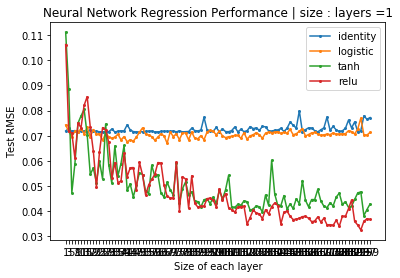

In [ ]:
analyse_nn_regressor(1,200,2)

In [ ]:
analyse_nn_regressor(2,100,2)

activation function: identity
0.0723337571698 0.0725029302267
0.0718807579972 0.072100849767
0.0761184259475 0.076408682576
0.0716160595805 0.0717441981316
0.0719339259275 0.0721107943792
0.0714566148408 0.0715980347635
0.0726508450933 0.0727533662399
0.0717798368441 0.0719652621124
0.0715922535589 0.0717223702572
0.0714889812977 0.0716083662466
0.0718410700874 0.0719762170336
0.0718861526495 0.0719024554316
0.0714889634642 0.0716696972963
0.0736751691099 0.0735156833652
0.0716381557127 0.0718467173465
0.0719832234892 0.0723114045684
0.0718435214791 0.0716825433745
0.0718437038267 0.0720393860683
0.0715752325713 0.0716990850043
0.0789801661569 0.0779854710753
0.0716303857582 0.0717510170209
0.0723916703032 0.072114914017
0.0723664012401 0.0725105287511
0.0718895872604 0.0721163981929
0.0717577613804 0.0718555330496
0.0715993809014 0.0717043895668
0.0722606401491 0.0723716379692
0.0720402341931 0.0719826004099
0.0721064967845 0.0724990205715
0.0773705763044 0.078144153899
0.071569709826

/Users/satya/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.042028965015 0.0445243889138
0.132974881849 0.127128065485
0.0383063180003 0.0416010786866
0.0356506682856 0.0390833124804
0.0376119309606 0.040848565038
0.0362569877017 0.039708331884
0.0361324912223 0.0386668456456


In [ ]:
analyse_nn_regressor(3,50,2)

In [ ]:
analyse_nn_regressor(5,20,2)

## KNN

In [ ]:
dataset.columns

In [ ]:
def analyze_knn(neighbor_range,remove_cols=[]):
    removed_data = dataset.drop(remove_cols,axis=1)
    X_r,Y_r = getX_Y_from_dataset(removed_data)
    X_r = one_hot_encode(X_r)
    errors = []

    for neighbors in neighbor_range:
        print("Neighbors:",neighbors)
        knn_model = KNeighborsRegressor(n_neighbors = neighbors )
        tr,ts,m = perform_10fold(X_r,Y_r,knn_model)
        errors.append(ts)
    plt.title('KNN Regression Performance excluding columns '+str(remove_cols))
    plt.xlabel('Neighbors')
    plt.ylabel('Test RMSE Error')
    plt.plot(neighbor_range,errors,marker='.',markersize=4)
    plt.show()
    
    

In [ ]:
analyze_knn(range(2,100,2))

In [ ]:
analyze_knn(range(2,100,2),['Week #','File Name'])

In [23]:
workflows = list(set(dataset['Work-Flow-ID'].values))
workflow_datasets=[dataset.loc[dataset['Work-Flow-ID'] == x] for x in  workflows]
workflow_datasets_xy = [getX_Y_from_dataset(d) for d in workflow_datasets] 
workflow_datasets_xy_oh = [(one_hot_encode(x[0]),x[1]) for x in workflow_datasets_xy]

### Part 2d

In [24]:
workflow_datasets_xy_oh = [(scalar_encode(x[0]),x[1]) for x in workflow_datasets_xy]

In [25]:
def plot_graph(x,y,xlabel,ylabel,title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, color='blue', lw=1, label=y,s=3)
    #plt.plot([y.min(), y.max()], [0,0], 'k--', lw=4)
    plt.show()

In [26]:
def plot_graph_time(y1,y2,y1label,y2label,ylabel,title):
    plt.title(title)
    plt.scatter(np.arange(y1.shape[0]), y1, color='blue', label=y1label,s=3)
    plt.scatter(np.arange(y1.shape[0]), y2, color='red', label=y2label,s=3)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.show()

### 2d (i)

In [29]:
def analyse_lin_reg_separate(plots=False):
    i = 0
    for x in workflow_datasets_xy_oh:
        print(workflows[i])
        i+=1
        regressor = LinearRegression()
        avg_tr,avg_ts,bestModel = perform_10fold(x[0],x[1],regressor)
        print("------------------------------")
        print("Average Training RMSE : ",avg_tr)
        print("Average Test RMSE : ",avg_ts)
        predicted = bestModel.predict(x[0])
        if(plots):
            plot_graph(x[1],predicted,"Actual","Fitted","Fitted vs Actual")
            plot_graph_time(x[1],predicted,"Actual","Fitted","Actual and Fitted values","Actual and Fitted values over time")
            plot_graph(predicted,x[1]-predicted,"Fitted","Residual","Residual vs Fitted")
            plot_graph_time(x[1]-predicted,predicted,"Residual","Fitted","Residual and Fitted values","Residual and Fitted values over time")


In [49]:
def analyse_poly_lin_reg_separate(plots=False,poly_degrees = []):
    i = 0
    test_rm = defaultdict(list)
    train_rm= defaultdict(list)
    best_deg_map = {}
    for x in workflow_datasets_xy_oh:
        print("****************************")
        print(workflows[i])        
        best_ts = 10000
        best_model = None
        best_deg = -1
        best_poly = None
        for deg in poly_degrees:
            regressor = LinearRegression()
            poly = PolynomialFeatures(deg)
            x_ = poly.fit_transform(x[0])
            avg_tr,avg_ts,bestModel = perform_10fold(x_,x[1],regressor)
            test_rm[workflows[i]].append(avg_ts)
            train_rm[workflows[i]].append(avg_ts)
            print("average Training RMSE : ",avg_tr)
            print("average Test RMSE : ",avg_ts)
            if(avg_ts<=best_ts):
                best_ts = avg_ts
                best_model = bestModel
                best_deg = deg
                best_poly = poly
                print('best so far',deg)
        x_tot = best_poly.transform(x[0])
        predicted = best_model.predict(x_tot)
        best_deg_map[workflows[i]]=best_deg
        if(plots):
            plot_graph(x[1],predicted,"Actual","Fitted",str(workflows[i])+" Fitted vs Actual")
            plot_graph_time(x[1],predicted,"Actual","Fitted","Actual and Fitted values",str(workflows[i])+" Actual and Fitted values over time")
            plot_graph(predicted,x[1]-predicted,"Fitted","Residual",str(workflows[i])+" Residual vs Fitted")
            plot_graph_time(x[1]-predicted,predicted,"Residual","Fitted","Residual and Fitted values",str(workflows[i])+" Residual and Fitted values over time")
        i+=1
    print(best_deg)
    for x in workflows:
        plt.plot(poly_degrees,test_rm[x], label = x, marker='.',markersize=4)
    plt.title('Avg Test RMSE Vs Polynomial Degree')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Test RMSE')
    plt.legend()
    plt.show()
    for x in workflows:
        plt.plot(poly_degrees,train_rm[x], label = x, marker='.',markersize=4)
    plt.title('Avg Train RMSE Vs Polynomial Degree')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Train RMSE')
    plt.legend()
    plt.show()
    
        
        

****************************
work_flow_2
average Training RMSE :  0.0231230813971
average Test RMSE :  0.0233469774342
best so far 2
average Training RMSE :  0.0179179355175
average Test RMSE :  0.018281039779
best so far 3
average Training RMSE :  0.0160836384468
average Test RMSE :  0.0169495419112
best so far 4
average Training RMSE :  0.0146483400545
average Test RMSE :  0.0175244295187
average Training RMSE :  0.0116757943485
average Test RMSE :  0.344180158724
average Training RMSE :  0.00929978783241
average Test RMSE :  0.0574186142412
average Training RMSE :  0.00844406908179
average Test RMSE :  31.7117657286
****************************
work_flow_3
average Training RMSE :  0.0055647885018
average Test RMSE :  0.00561484658734
best so far 2
average Training RMSE :  0.00504720319382
average Test RMSE :  0.00514147177584
best so far 3
average Training RMSE :  0.0044829499828
average Test RMSE :  0.00482747603225
best so far 4
average Training RMSE :  0.00410615220968
average Te

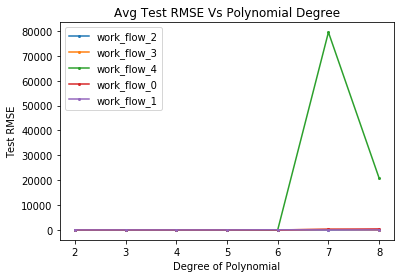

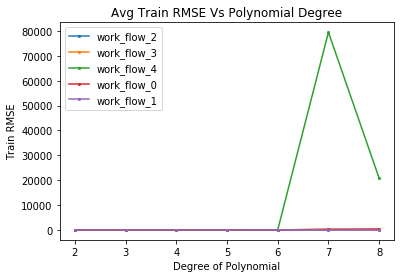

In [50]:
analyse_poly_lin_reg_separate(poly_degrees=[2,3,4,5,6,7,8])